In [2]:
from data import Document
from isrl import read_predominant_roles , Scorer,\
    iter_candidates
import isrl
import nltk
from feizabadi_pado import NIWrapper, gen_training_examples_dni_linking_soft
import preprocess_on5v
import os
from features import feizabadi_pado_features_10_ontonotes
import feizabadi_pado
from isrl import silberer_frank_filter_candidates

feizabadi_pado.candidate_func = silberer_frank_filter_candidates(iter_candidates)
ff = feizabadi_pado_features_10_ontonotes


In [3]:
preprocess_on5v.out_dir_cv

['preprocessed_data/on5v/v1.0/cv-00',
 'preprocessed_data/on5v/v1.0/cv-01',
 'preprocessed_data/on5v/v1.0/cv-02',
 'preprocessed_data/on5v/v1.0/cv-03',
 'preprocessed_data/on5v/v1.0/cv-04',
 'preprocessed_data/on5v/v1.0/cv-05',
 'preprocessed_data/on5v/v1.0/cv-06',
 'preprocessed_data/on5v/v1.0/cv-07',
 'preprocessed_data/on5v/v1.0/cv-08',
 'preprocessed_data/on5v/v1.0/cv-09']

In [4]:
read_predominant_roles()
dir_cv = preprocess_on5v.out_dir_cv[6]
examples = []
train_dir = os.path.join(dir_cv, 'train')
test_dir = os.path.join(dir_cv, 'test')
for fname in os.listdir(train_dir):
    if fname.endswith('.xml'):
        path = os.path.join(train_dir, fname)
        train_doc = Document(path)
        examples.extend(gen_training_examples_dni_linking_soft(train_doc, ff))

In [5]:
from collections import Counter
Counter(y for _, y in examples)

Counter({'No': 2532, 'Yes': 196})

In [6]:
nb = nltk.NaiveBayesClassifier.train(examples)

In [28]:
nb.show_most_informative_features(10)

Most Informative Features
                   key09 = '0.55'            Yes : No     =     12.4 : 1.0
                   key03 = 'IN'              Yes : No     =     12.3 : 1.0
                   key04 = 'NP-2'            Yes : No     =     11.3 : 1.0
                   key04 = 'NP-PRD'          Yes : No     =      8.3 : 1.0
                   key04 = 'S'                No : Yes    =      7.0 : 1.0
                   key04 = 'NP-SBJ-4'        Yes : No     =      6.8 : 1.0
                   key09 = '0.6'             Yes : No     =      5.8 : 1.0
                   key03 = 'VBN'              No : Yes    =      5.4 : 1.0
                   key02 = '4.5'              No : Yes    =      5.1 : 1.0
                   key08 = 'True'            Yes : No     =      4.5 : 1.0


In [8]:
Counter(nb.classify_many([x for x, _ in examples]))

Counter({'No': 2509, 'Yes': 219})

In [9]:
from collections import defaultdict
feat_vals = defaultdict(list)
for i in range(10):
    key = 'key%02d' %i
    feat_vals[i] = [x[key] for x, _ in examples]

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

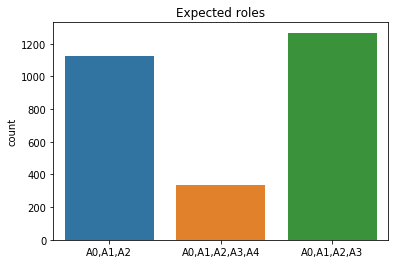

In [11]:
sns.countplot(feat_vals[0]).set_title('Expected roles')

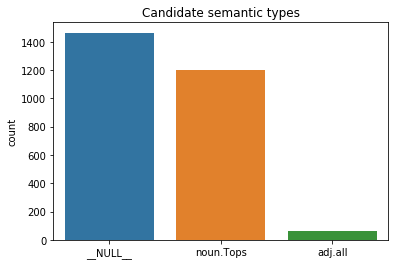

In [12]:
sns.countplot(feat_vals[1]).set_title('Candidate semantic types')

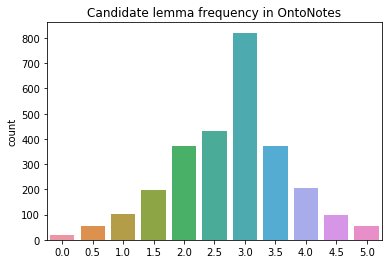

In [13]:
sns.countplot(sorted(feat_vals[2])).set_title('Candidate lemma frequency in OntoNotes')

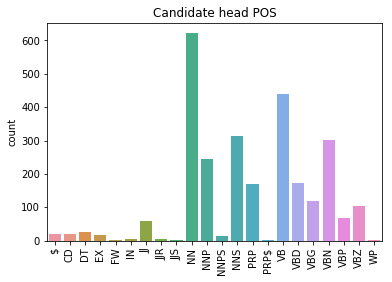

In [14]:
g = sns.countplot(sorted(feat_vals[3]))
g.set_title('Candidate head POS')
loc, labels = plt.xticks()
_ = g.set_xticklabels(labels, rotation=90)

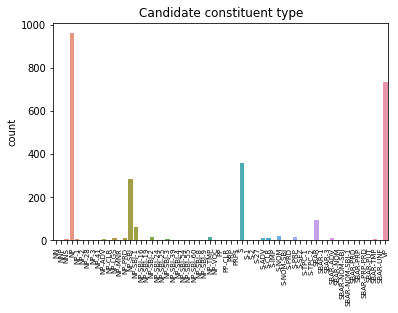

In [17]:
g = sns.countplot(sorted(feat_vals[4]))
g.set_title('Candidate constituent type')
loc, labels = plt.xticks()
_ = g.set_xticklabels(labels, rotation=90, size='x-small')

In [18]:
len(Counter(feat_vals[4]))

63

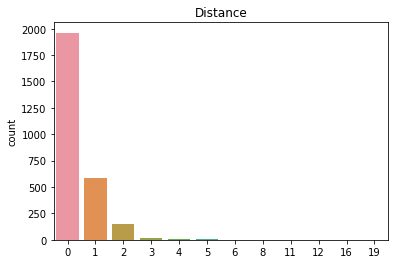

In [30]:
sns.countplot(sorted(int(v) for v in feat_vals[5])).set_title('Distance')

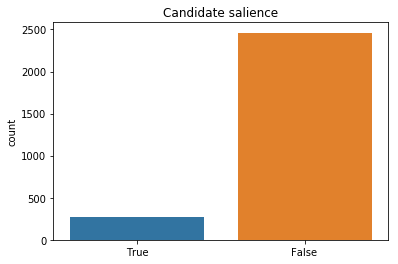

In [20]:
sns.countplot(feat_vals[6]).set_title('Candidate salience')

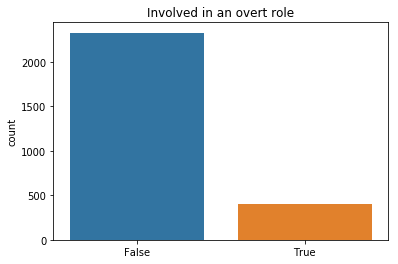

In [21]:
sns.countplot(feat_vals[7]).set_title('Involved in an overt role')

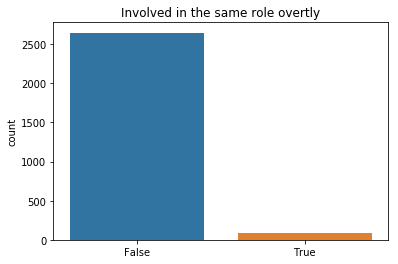

In [22]:
sns.countplot(feat_vals[8]).set_title('Involved in the same role overtly')

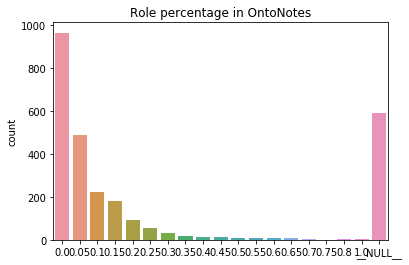

In [23]:
sns.countplot(sorted(feat_vals[9])).set_title('Role percentage in OntoNotes')

In [24]:
Counter(feat_vals[9])

Counter({'0.0': 965,
         '0.05': 489,
         '0.1': 223,
         '0.15': 179,
         '0.2': 94,
         '0.25': 55,
         '0.3': 34,
         '0.35': 20,
         '0.4': 13,
         '0.45': 15,
         '0.5': 11,
         '0.55': 8,
         '0.6': 10,
         '0.65': 9,
         '0.7': 3,
         '0.75': 1,
         '0.8': 2,
         '1.0': 5,
         '__NULL__': 592})

In [26]:
with open('out/lemma_frequency_ontonotes.2018-01-04-d8c47e8.txt') as f: 
    s = f.read()
print(s[:200])

!	1800
!!	39
!!!	12
!!!!	6
!!!!!	1
!!!!!!!!	1
!!!!!!!!!!!!!!!!	1
!!!!.	1
!!.	1
!!?	3
!!??	2
!*	1
!.	4
!?	6
"	7488
"!!"	2
""	1
#	133
##'s	1
#15	2
#NAME	1
$	4266
$Whose	1
%	4991
%ach	1
%ah	78
%eh	120
%e


## Examine cases

In [2]:
on5v_path = 'data/conll_impl_roles_release/all.conll'
from preprocess_on5v import out_dir_cv
out_dir_cv

['preprocessed_data/on5v/v1.0/cv-00',
 'preprocessed_data/on5v/v1.0/cv-01',
 'preprocessed_data/on5v/v1.0/cv-02',
 'preprocessed_data/on5v/v1.0/cv-03',
 'preprocessed_data/on5v/v1.0/cv-04',
 'preprocessed_data/on5v/v1.0/cv-05',
 'preprocessed_data/on5v/v1.0/cv-06',
 'preprocessed_data/on5v/v1.0/cv-07',
 'preprocessed_data/on5v/v1.0/cv-08',
 'preprocessed_data/on5v/v1.0/cv-09']

In [11]:
import os, re
from data import Document
import pandas as pd

data = []
for dir_cv in out_dir_cv:
    test_dir = os.path.join(dir_cv, 'test')
    for fname in os.listdir(test_dir):
        if re.search('\.xml$', fname):
            path = os.path.join(test_dir, fname)
            doc = Document(path)
            for frame_elem in doc.frames:
                pred = frame_elem.get('name')
                for flag_elem in frame_elem.iterfind('.//flag[@name="Definite_Interpretation"]'):
                    fe = flag_elem.getparent()
                    role = fe.get('name')                    
                    idref = fe.find('fenode').get('idref')
                    filler = ' '.join(doc.id2words[idref])
                    head = ' '.join(doc.id2words[doc.id2head[idref]])
                    data.append((pred, role, head, filler))
df = pd.DataFrame(data, columns=['Predicate', 'Role', 'Filler head', 'Filler full'])
df

Predicate Role  Filler head                                Filler full
0     give.01   A0   Department                     Defense Department the
1     give.01   A2        ships                              US Navy ships
2      pay.01   A0         they                                       they
3      pay.01   A3          for                 for the reinforcement work
4      pay.01   A3      resolve  to resolve of birth and life difficulties
5      pay.01   A2     refugees                               the refugees
6      pay.01   A0      parents                                    parents
7      pay.01   A2   candidates                 candidates of his choosing
8     give.01   A0          him                                        him
9      pay.01   A3    agreement                              the agreement
10    give.01   A0        funds   the funds that did best week the last in
11     pay.01   A0      Baghdad                                    Baghdad
12   bring.01   A4           at                               the shore at
13     pay.01   A0      Weirton                           , Weirton W. Va.
14   leave.01   A1         city                                   the city
15    give.01   A0       Chavez                                     Chavez
16     pay.01   A2    creditors                                  creditors
17   leave.01   A1      Baghdad                                    Baghdad
18   leave.01   A1         Iraq                                       Iraq
19    give.01   A0      company                                the company
20    give.01   A0         Bush                                       Bush
21     pay.01   A3     products                              U.S. products
22     pay.01   A2         U.S.                                       U.S.
23   leave.01   A1        House                            the White House
24    give.01   A2   consortium                   a new private consortium
25   leave.01   A1       fields                             the oil fields
26    give.01   A0      alcohol                                    alcohol
27     pay.01   A2     families                     families the victims '
28     put.01   A0      drivers                                    drivers
29   bring.01   A2     Xinjiang                                   Xinjiang
..        ...  ...          ...                                        ...
179    pay.01   A0        buyer                                    a buyer
180   give.01   A0        stock                                  the stock
181    pay.01   A2         they                                       they
182    pay.01   A2      company                                the company
183    pay.01   A2     insurers                                   insurers
184    pay.01   A2    Insureres                                  Insureres
185   give.01   A2           we                                         we
186    pay.01   A2     WorldCom        WorldCom then known as MCI WorldCom
187    pay.01   A0          its                                        its
188    pay.01   A3         food                 American food and medicine
189   give.01   A2  Afghanistan                                Afghanistan
190   give.01   A0       agenda                          that grand agenda
191    pay.01   A2    Committee        the International Olympic Committee
192    put.01   A0       voters                         most French voters
193    put.01   A0       voters                         most French voters
194    pay.01   A1            $                                   $ 25,000
195    pay.01   A3         plan                a voluntary settlement plan
196    pay.01   A2       states                                 the states
197   give.01   A2           us                                         us
198  bring.01   A2         here                                       here
199  bring.01   A4      Germany                                    Germany
200  leave.01   A1         to

In [15]:
df2 = df.sort_values(['Predicate', 'Role'])
df2.to_html('/Users/cumeo/Downloads/analyze_on5v.html')

In [ ]:
print(df2.to_latex(index=False))

In [21]:
from collections import Counter
Counter(df['Predicate']).most_common()

[('pay.01', 97),
 ('give.01', 57),
 ('bring.01', 25),
 ('leave.01', 19),
 ('put.01', 8),
 ('leave.04', 3)]

In [25]:
data3 = []
for dir_cv in ['preprocessed_data/on5v/v1.0/cv-09']:
    test_dir = os.path.join(dir_cv, 'test')
    for fname in os.listdir(test_dir):
        if re.search('\.xml$', fname):
            path = os.path.join(test_dir, fname)
            doc = Document(path)
            for frame_elem in doc.frames:
                pred = frame_elem.get('name')
                for flag_elem in frame_elem.iterfind('.//flag[@name="Definite_Interpretation"]'):
                    fe = flag_elem.getparent()
                    role = fe.get('name')                    
                    idref = fe.find('fenode').get('idref')
                    filler = ' '.join(doc.id2words[idref])
                    head = ' '.join(doc.id2words[doc.id2head[idref]])
                    data3.append((pred, role, head, filler))
df3 = pd.DataFrame(data3, columns=['Predicate', 'Role', 'Filler head', 'Filler full'])
df3

Predicate Role  Filler head                          Filler full
0     pay.01   A0          its                                  its
1     pay.01   A3         food           American food and medicine
2    give.01   A2  Afghanistan                          Afghanistan
3    give.01   A0       agenda                    that grand agenda
4     pay.01   A2    Committee  the International Olympic Committee
5     put.01   A0       voters                   most French voters
6     put.01   A0       voters                   most French voters
7     pay.01   A1            $                             $ 25,000
8     pay.01   A3         plan          a voluntary settlement plan
9     pay.01   A2       states                           the states
10   give.01   A2           us                                   us
11  bring.01   A2         here                                 here
12  bring.01   A4      Germany                              Germany
13  leave.01   A1         town                      a military town
14   give.01   A0       Accord                      the Oslo Accord
15    pay.01   A0        banks                          major banks
16    pay.01   A2     investor                             investor
17  bring.01   A4           at                   at the White House
18    pay.01   A2        group                  The terrorist group
19  leave.01   A0       friend                           one friend
20  leave.01   A1        there                                there
21    pay.01   A2           to              to American Continental

In [28]:
df3[['Predicate', 'Role']]

Predicate Role
0     pay.01   A0
1     pay.01   A3
2    give.01   A2
3    give.01   A0
4     pay.01   A2
5     put.01   A0
6     put.01   A0
7     pay.01   A1
8     pay.01   A3
9     pay.01   A2
10   give.01   A2
11  bring.01   A2
12  bring.01   A4
13  leave.01   A1
14   give.01   A0
15    pay.01   A0
16    pay.01   A2
17  bring.01   A4
18    pay.01   A2
19  leave.01   A0
20  leave.01   A1
21    pay.01   A2